In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data['Gender'] = data.Gender.map({"Male":1, "Female":0})

In [4]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
data["Gender"] = data["Gender"].fillna(1)

In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [8]:
x = data.iloc[:,[1,2,3]]
y = data["Purchased"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [10]:
obj = StandardScaler()
x_train = obj.fit_transform(x_train)
x_test = obj.fit_transform(x_test)

In [11]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [14]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[49,  3],
       [ 7, 21]], dtype=int64)

In [15]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        52
           1       0.88      0.75      0.81        28

    accuracy                           0.88        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.88      0.88      0.87        80



In [18]:
print("Accuracy: ", (cm[0][0]+cm[1][1])/cm.sum())
print("Error rate: ", 1 - (cm[0][0]+cm[1][1])/cm.sum())
print("Precision: ", cm[0][0]/(cm[0][0]+cm[1][0]))
print("recall: ", cm[0][0]/(cm[0][0]+cm[0][1]))

Accuracy:  0.875
Error rate:  0.125
Precision:  0.875
recall:  0.9423076923076923


<Axes: >

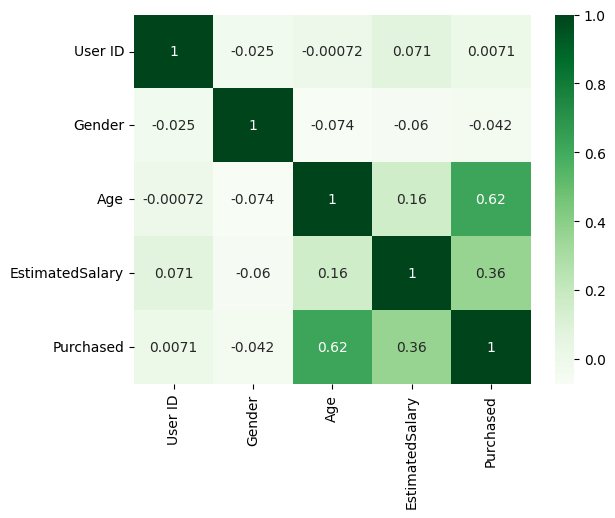

In [17]:
import seaborn as sns
datacore = data.corr()
sns.heatmap(datacore, annot=True, cmap="Greens")